# # In this assignment build the random forest model after normalizing the variable to house pricing from boston data set.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

*Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

# loading dataset boston

In [5]:
boston = datasets.load_boston()

# Create a dataframe

In [6]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['TARGET'] = boston.target
#X = boston.data
df.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30,15.6
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2


# loading top 5 dataset

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Shape of dataset

In [8]:
df.shape

(506, 14)

# info 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# describe

In [10]:
df.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,4.0,9.0,0.0,0.0,0.0,4.0,89.0
ZN,506.0,11.0,23.0,0.0,0.0,0.0,12.0,100.0
INDUS,506.0,11.0,7.0,0.0,5.0,10.0,18.0,28.0
CHAS,506.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NOX,506.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
RM,506.0,6.0,1.0,4.0,6.0,6.0,7.0,9.0
AGE,506.0,69.0,28.0,3.0,45.0,78.0,94.0,100.0
DIS,506.0,4.0,2.0,1.0,2.0,3.0,5.0,12.0
RAD,506.0,10.0,9.0,1.0,4.0,5.0,24.0,24.0
TAX,506.0,408.0,169.0,187.0,279.0,330.0,666.0,711.0


## checking total no. of 0's in dataframe 

In [11]:
(df==0).sum()

CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
TARGET       0
dtype: int64

#replacing 0's with NaN in ZN column

In [12]:
df.ZN.replace(0,np.nan,inplace=True)
(df['ZN']==0).sum()

0

In [13]:
df.CHAS.replace(0,np.nan,inplace=True)
(df['CHAS']==0).sum()

0

# checking for missing data

In [14]:
df.isnull().sum()/len(df)*100

CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
TARGET      0.000000
dtype: float64

more than 70% of data is missing in ZN and CHAS columns , hence we will drop both the columns

In [15]:
df = df.drop(['ZN','CHAS'],axis =1)
df

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# checking for duplicates

In [16]:
df.duplicated().sum()

0

# Exploratory Data Analysis

1. Univariate Analysis

In [17]:
df.columns.nunique()

12

plotting histogram and boxplot for all columns using subplots

In [18]:
def plotHist_box(d):
    fig,axes =plt.subplots(nrows =d.columns.nunique(),ncols =2,figsize=(20,50))
    r =0
    for i in d.columns:
        sns.histplot(df[i],kde= True,ax=axes[r][0])
        sns.boxplot(x=i,data=d, ax=axes[r][1])
        plt.show
        r = r +1

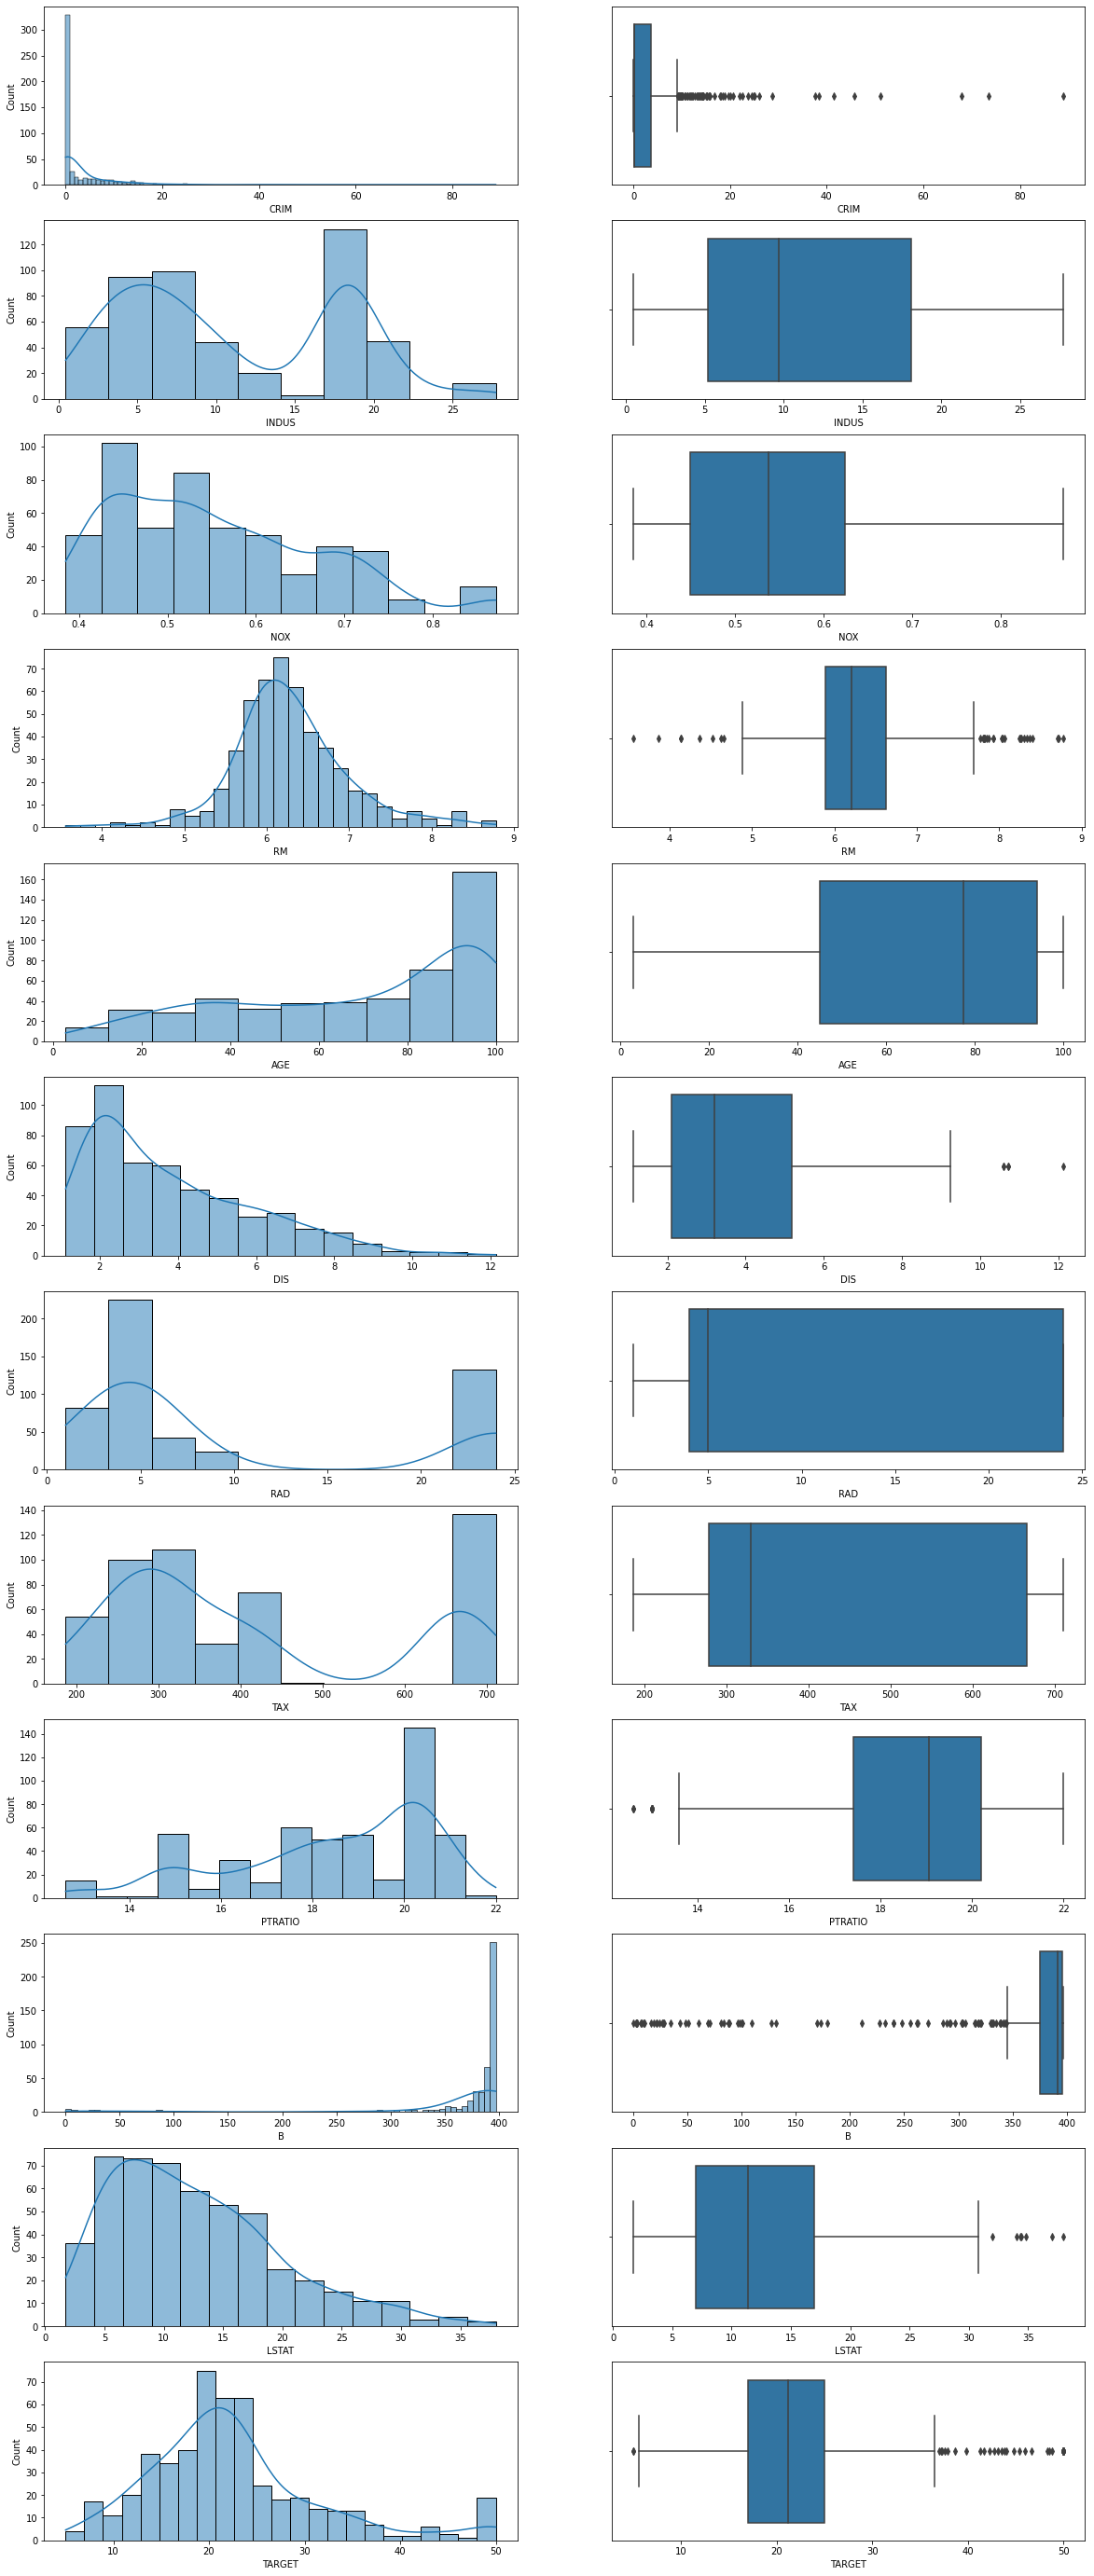

In [19]:
plotHist_box(df)

2. Bivariate Analysis

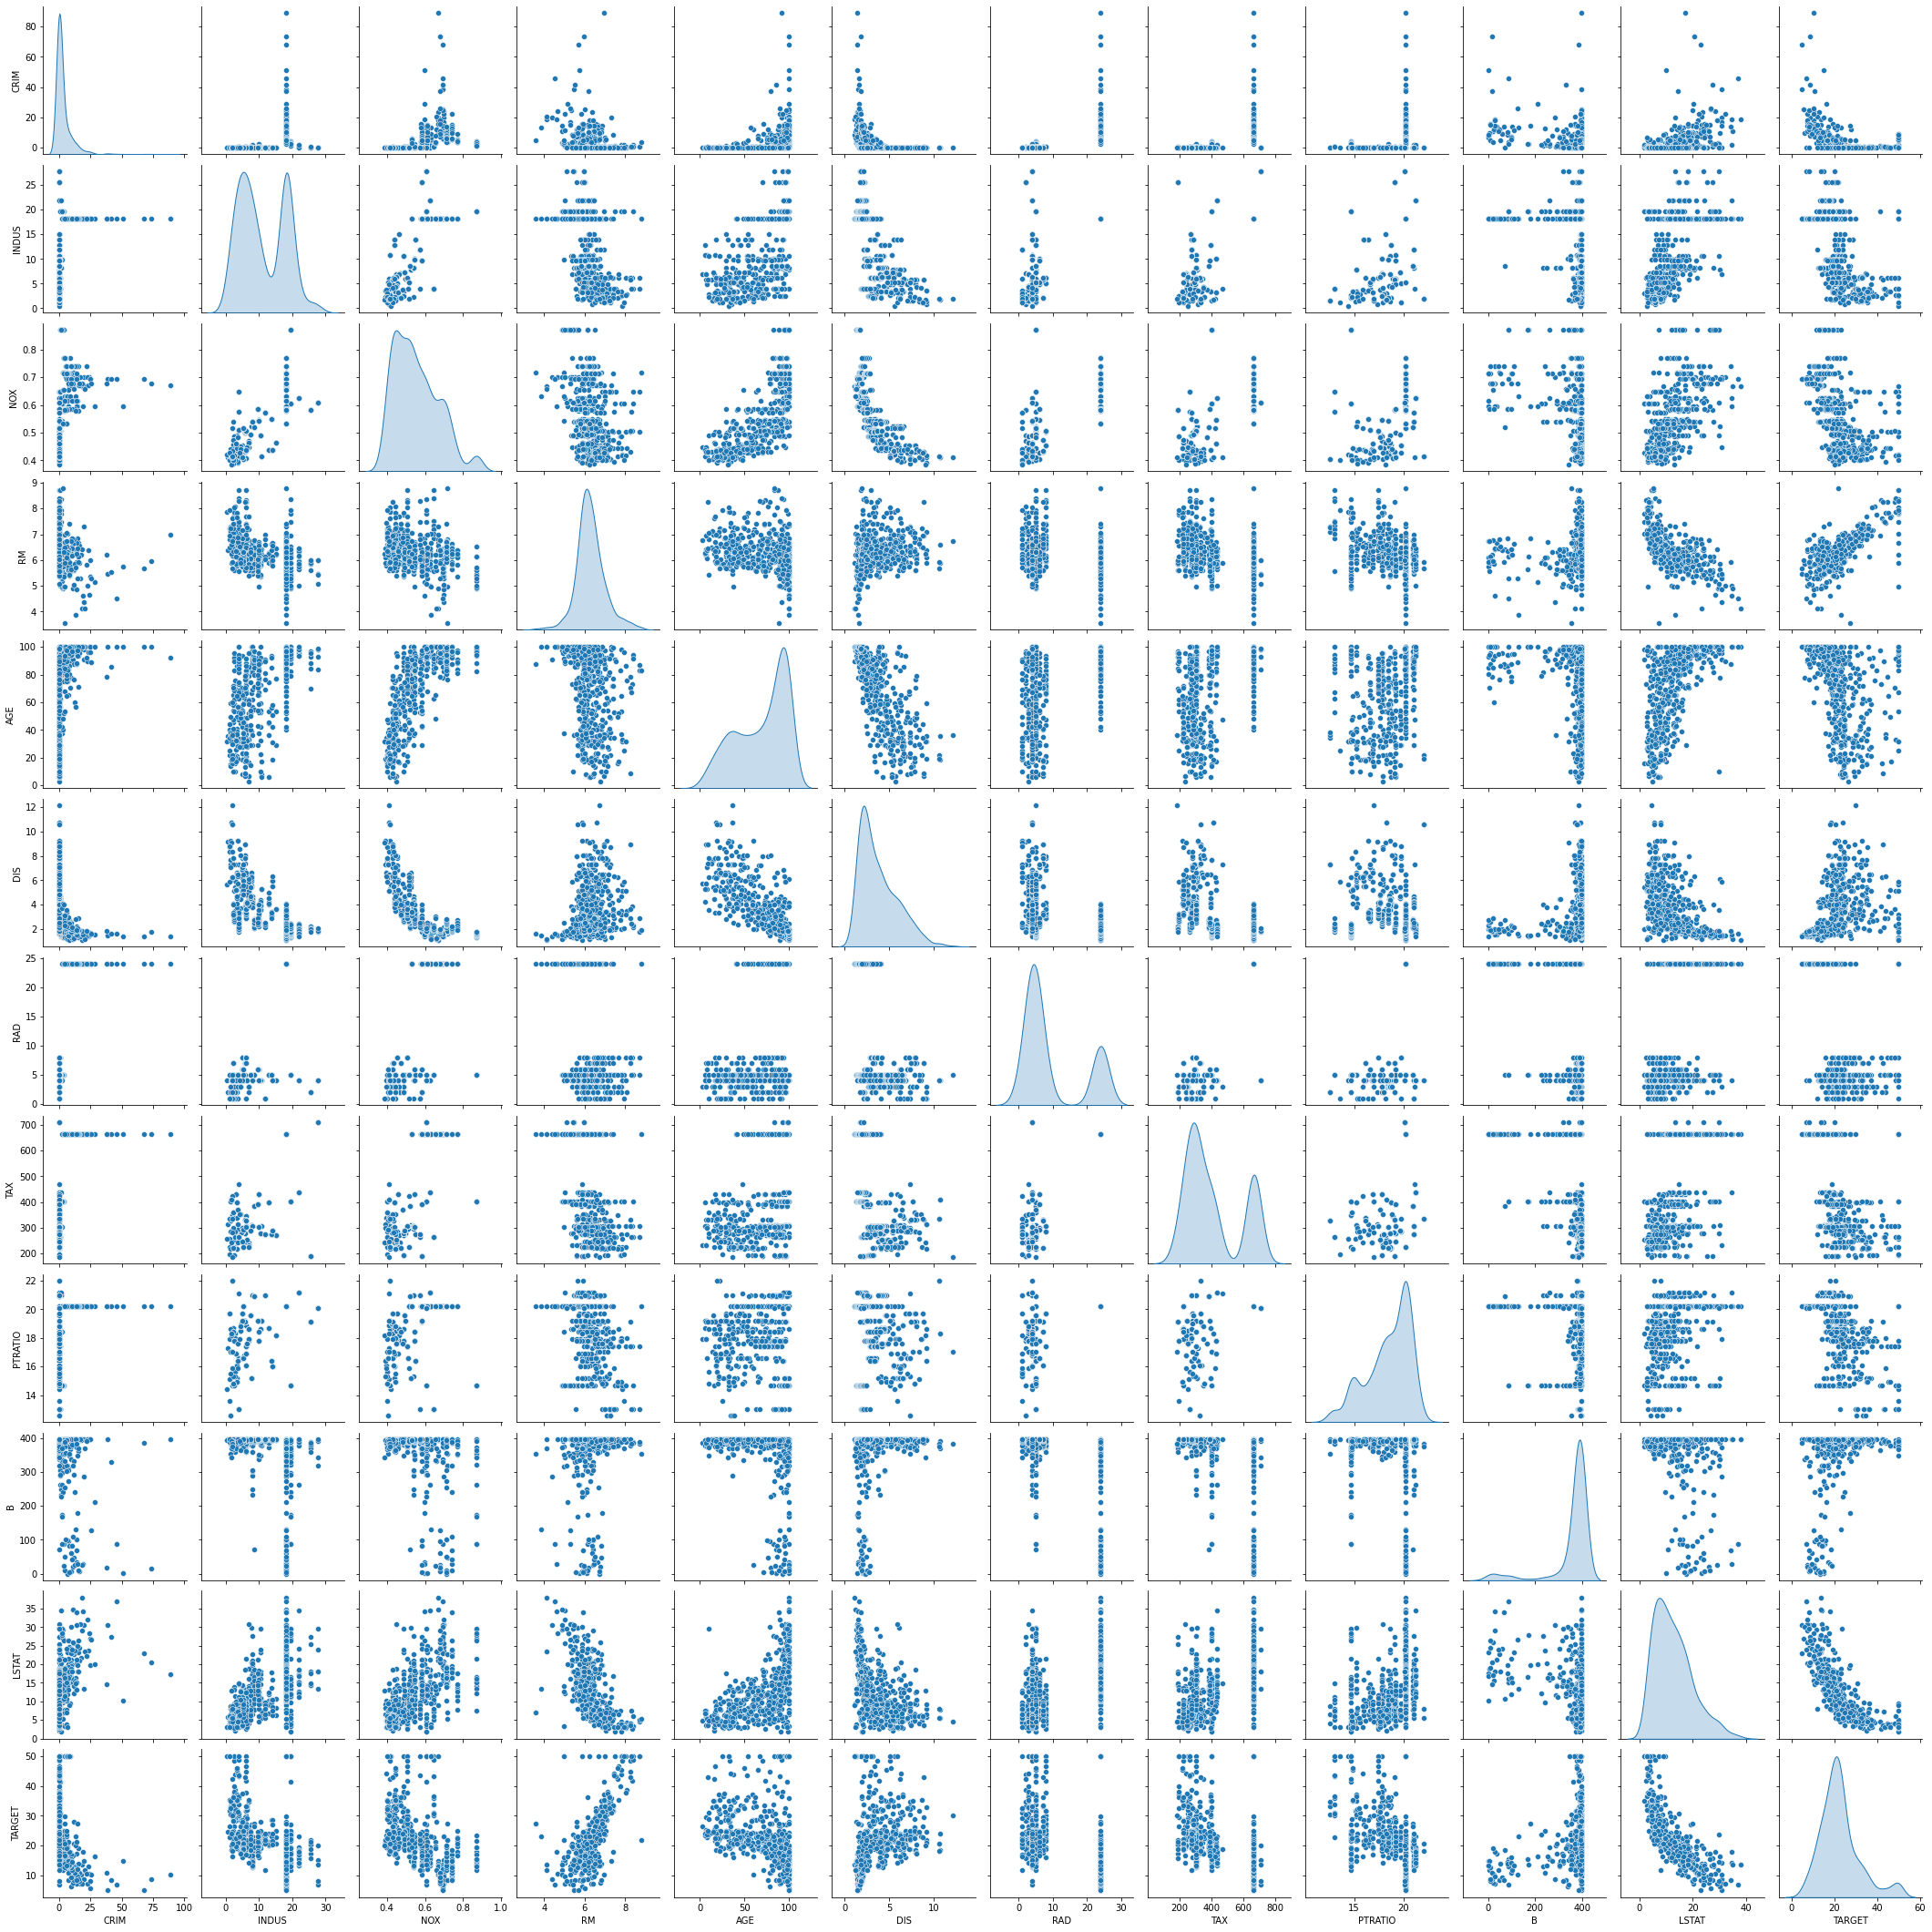

In [20]:
sns.pairplot(df,diag_kind='kde')
plt.show()

## Heatmap to show correlation

<AxesSubplot:>

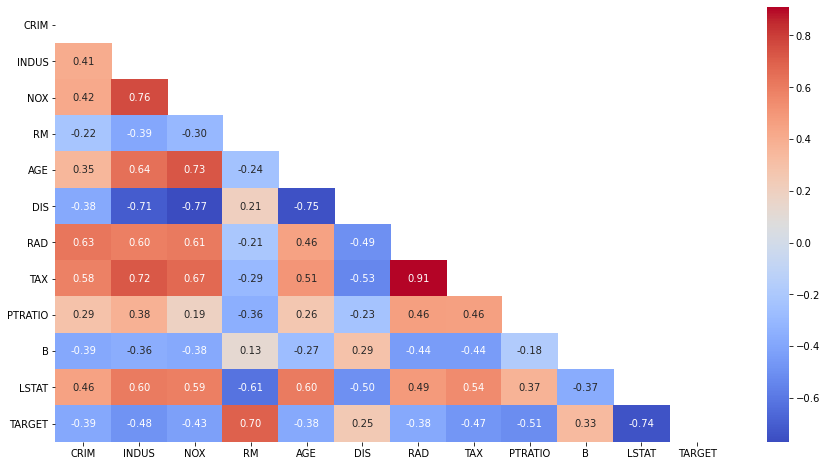

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), mask=np.triu(df.corr()), cmap='coolwarm', annot=True, fmt='.2f')

(i) Correlation between independent variables:

We would need to look out for features of multi-collinearity (i.e. features that are correlated with each other)as this will affect our relationship with the independent variable.
Observe that RAD and TAX are highly correlated with each other (Correlation score: 0.92) while there are a couple of features which are somewhat correlated with one another with a correlation score of around 0.70 (INDUS and TAX, NOX and INDUS, AGE and DIS, AGE and INDUS).

(ii) Correlation between independent variable and dependent variable:
In order for our regression model to perform well, we ideally need to select those features that are highly correlated with our dependent variable (TARGET).

We observe that both RM and LSTAT are correlated with TARGET with a correlation score of 0.66 and 0.74 respective. This can also be illustrated via the scatter plot .

Text(0, 0.5, 'TARGET')

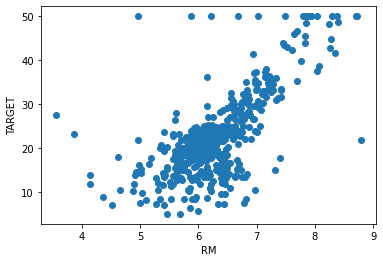

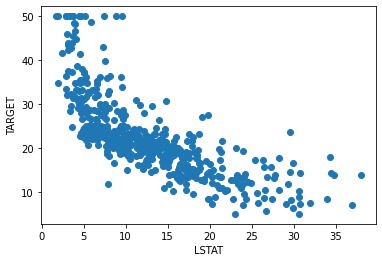

In [22]:
#Scatter plot to observe the correlations between the features that are highly correlated with TARGET

target_var = df['TARGET']

plot1 = plt.figure(1)
plt.scatter(df['RM'],target_var)
plt.xlabel('RM')
plt.ylabel('TARGET')

plot2 = plt.figure(2)
plt.scatter(df['LSTAT'],target_var)
plt.xlabel('LSTAT')
plt.ylabel('TARGET')

From the scatter plot above:

i) TARGET increases linearly with the RM. This makes sense as we would expect the median price of a house would be more generally more expensive as the number of rooms increases.

ii) TARGET decreases linearly with LSTAT. This also makes sense since we can expect the median price of a house would generally be less expensive at places of lower status.

## Train_test_split

In [23]:
X = df.drop('TARGET',axis=1)
y = df['TARGET']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=355)

In [24]:
print(X.shape)
print(y.shape)

(506, 11)
(506,)


## Applying Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

## checking for Model score of trained & tested data

In [26]:
print(f"Train_model_score: {rfr.score(x_train,y_train)}")
print(f"Test_model_score: {rfr.score(x_test,y_test)}")

Train_model_score: 0.9798190262727616
Test_model_score: 0.8755809996848954


## Hyperparameter Tuning using GridSearchCV

In [27]:
#grid_params = {"n_estimators" : [10,40,65,100],"max_depth" : range(2,20,1),"min_samples_leaf" : range(1,10,1),"min_samples_split" : range(2,10,1),"max_features" : ['auto','log2']}

grid_params = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

In [28]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfr,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)

In [29]:
grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]},
             verbose=3)

## Getting Best Params for the model

In [30]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 501}

In [31]:
rfr2 = RandomForestRegressor(n_estimators=40,max_depth=19,min_samples_leaf=1,min_samples_split=4,max_features='log2')

In [32]:
rfr2.fit(x_train,y_train)

RandomForestRegressor(max_depth=19, max_features='log2', min_samples_split=4,
                      n_estimators=40)

In [33]:
rfr2.score(x_test,y_test)

0.8843070239911801

In [34]:
y_pred = rfr2.predict(x_test)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
print(f'R^2 : {r2_score(y_test,y_pred)}')
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 : 0.8843070239911801
MSE : 10.958147652420132
RMSE: 3.3103092986034


In [37]:
import pickle
pickle.dump(rfr2,open('random_forest_boston_price.sav','wb'))